# 1. 导入模型及获取数据

In [8]:
# 导入库
# 数据分析和探索
import pandas as pd
import numpy as np
import random as rnd

# 可视化 共有sns和plt两种
import seaborn as sns
import matplotlib.pyplot as plt

# 使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表
# 它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。
%matplotlib inline

# 机器学习模型
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
# 获取数据，训练集命名为train_df,测试集命名为test_df
# 合并集合combine，便于对特征进行处理时统一处理：for df in combine
train_df = pd.read_csv('C:/Users/XPS/Kaggle/titanic/train.csv')
test_df = pd.read_csv('C:/Users/XPS/Kaggle/titanic/test.csv')
combine = [train_df, test_df]  

# 2. 探索数据

## 2.1 数据特征及基本信息

In [10]:
 # 探索数据
# 查看字段结构、类型及head示例
# 默认正数5行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 探索数据
# 查看字段结构、类型及head示例
# 括号内是输出的行数
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
# 查看各特征非空样本量及字段类型
train_df.info()
print("_"*40) #为了在显示的时候分隔开test的数据和train的数据
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [13]:
# 查看数值类（int，float）特征的数据分布情况
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# 查看非数值类（object类）特征的数据分布情况
# include命令代表只看Object类型的（不是数字0）
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lehmann, Miss. Bertha",male,347082,B96 B98,S
freq,1,577,7,4,644


## 2.2 几个枚举型特征与Survived的关联性（直接group汇总求均值）

In [15]:
# as_index=False表示SQL风格的分组输出，不以组标签作为索引对象
# ascending=False表示降序排列
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by=["Survived"],ascending=False)
# 分析结果可发现，票的等级越高，存活率也越高

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
# 以as_index=True作为对比
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean().sort_values(by=["Survived"],ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
# 分析性别与存活率的关系
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by=["Survived"],ascending=False)
# 性别和是否生还强相关，女性用户的生还率明显高于男性

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
# 分析有兄弟姐妹或配偶的数量与存活率的关系
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by=["Survived"],ascending=False)
# 有0到2个兄弟姐妹或配偶的存活率高于其他数量的

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# 分析同行的父母或孩子总数与存活率的关系
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by=["Survived"],ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 2.3 对年龄这类跨度较长的特征使用直方图分别查看生还与否的分布

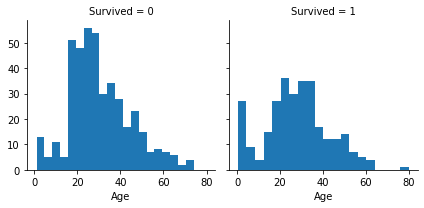

In [13]:
# 用sns.FacetGrid画出轮廓，然后用map填充内容
#  FacetGrid当您想要在数据集的子集中分别可视化变量的分布或多个变量之间的关系时，该类非常有用。
# 一个FacetGrid可以与多达三个维度可以得出：row，col，和hue。
# 前两个与得到的轴阵列有明显的对应关系; 将色调变量视为沿深度轴的第三个维度，其中不同的级别用不同的颜色绘制。

# col="Survived"意味着分别绘制Survived=0&1的两张图，且并列显示
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)
#小孩的生存人数多于死亡人数

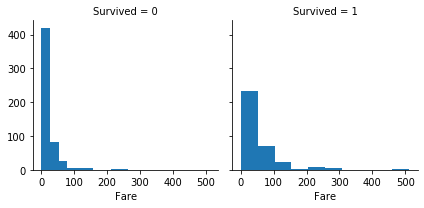

In [14]:
# 票价的关系
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=10)
# 死亡的人中，大部分是低票价的人

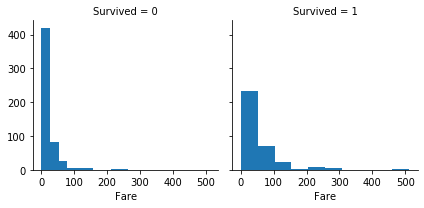

In [15]:
# bins后跟的数字指的是直方图柱形的个数
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=10)

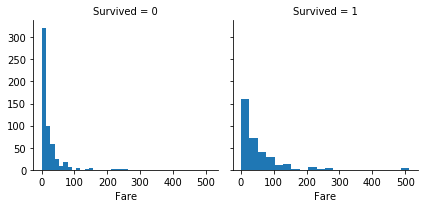

In [16]:
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=20)

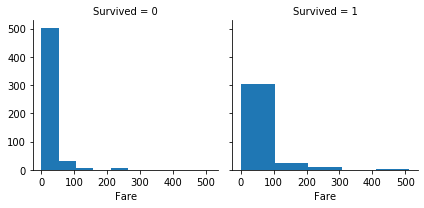

In [17]:
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=5)

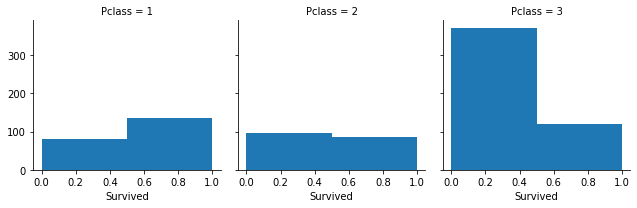

In [18]:
# 在不同Pclass级别下统计死亡与存活分别的人数
# Pclass=3中死亡人数明显高于存活人数
g = sns.FacetGrid(train_df,col="Pclass")
g.map(plt.hist,"Survived",bins=2)

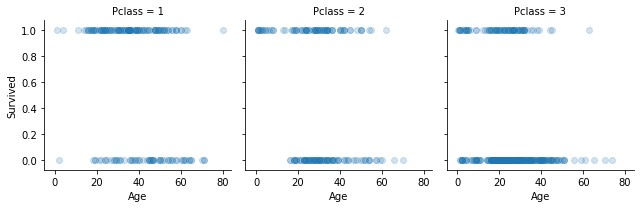

In [19]:
# alpha调整点的颜色深浅参数
# plt.scatter后先是横轴的变量名，再是纵轴的变量名
g = sns.FacetGrid(train_df,col="Pclass")
g.map(plt.scatter,"Age","Survived",alpha=0.2)

## 2.4 其他特征可视化探索

In [1]:
grid = sns.FacetGrid(train_df,row="Survived",col="Sex",aspect=1.6) # aspect参数设置调节的是图片单元格的横轴长度和纵轴的比
grid.map(plt.hist,"Age",alpha=.5,bins=20)
grid.add_legend() #加注释

NameError: name 'sns' is not defined

D:\ANACONDA3.7\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\ANACONDA3.7\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


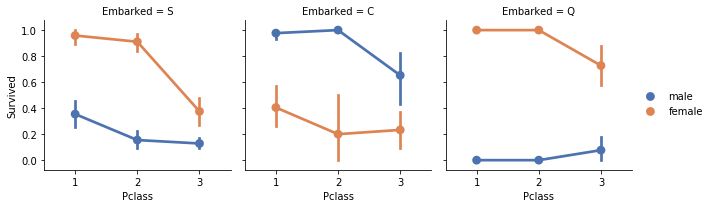

In [21]:
# palette一般在使用hue时来改变颜色的，有这几种系统给的可选deep, muted, bright, pastel, dark, colorblind
grid1 = sns.FacetGrid(train_df,col="Embarked")
grid1.map(sns.pointplot,"Pclass","Survived","Sex",palette = "deep")
grid1.add_legend() #出现了！！标注

D:\ANACONDA3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\ANACONDA3.7\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


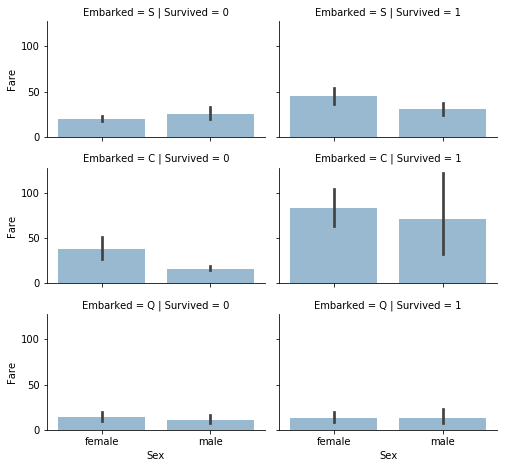

In [22]:
# 条形图所显示的数值默认为平均值，误差棒则表示各类的数值相对于条形图所显示的值的误差
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()

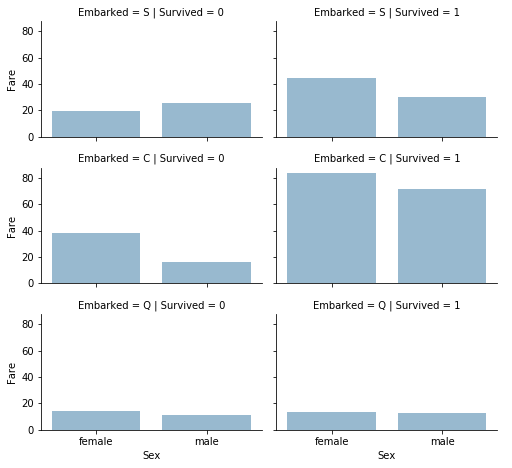

In [23]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5,ci=None)  # ci=None之后中间那个黑色的小柱子没有了，即误差棒
grid.add_legend()

# 3. 特征清洗

## 3.1 NameLength

In [24]:
# .apply(len)命令获取姓名的长度
train_df["Namelength"]=train_df["Name"].apply(len)
test_df["Namelength"]=test_df["Name"].apply(len)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Namelength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


## 3.2 HasCabin

In [26]:
# 构造一个特征表示船上的乘客是否拥有Cabin
# 在dataframe中，如果是空值，默认为float类型
# lambda是一个匿名函数，定义了一个若原Cabin的值为空值，则返回0，否则返回1的函数
train_df["HasCabin"]=train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df["HasCabin"]=test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

剔除Ticket（人为标定无关）和Cabin(有效数据太少)两个特征

In [27]:
# drop(labels,axis),axis=0删除行，axis=1删除列
train_df = train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)
combine=[train_df,test_df]

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,23,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,51,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,22,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,44,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,24,0


In [29]:
# 从shape的结果和下面单独列出的结果可以得出，combine[0]即train_df ; combine[1]即test_df，由于缺少survived的数据，所以列数少一列
print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

(891, 12) (418, 11) (891, 12) (418, 11)


In [30]:
combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,23,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,51,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,22,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,44,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,24,0


In [31]:
combine[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,16,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,32,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,25,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,16,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,44,0


## 3.3 Title

In [32]:
# "空格([A-Za-z]+)\."是一个正则化表达式，表示以空格开始，'.'结尾的中间由任意字母组成的文本内容
# expand : 布尔型,是否返回DataFrame
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
# crosstab是交叉列表，第一个参数是列，第二个参数是行
# sortvalues是列的index按照先男性title再女性title的方式排列
# 和性别匹配，看各类称号分别属于男or女，方便后续归类
pd.crosstab(train_df["Title"],train_df["Sex"]).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


可以发现，除了Miss, Mrs, Mr, Master这四个title以外，其余的title数量均较少，因此可将他们按性别合并为Rare_Male, Rare_Female

In [33]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess', 'Dona'],"Rare_Female")
    dataset["Title"] = dataset["Title"].replace(['Capt', 'Col','Don','Dr','Major',
                                                 'Rev','Sir','Jonkheer',],"Rare_Male")
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

In [34]:
# 把称号归类为Mr,Miss,Mrs,Master,Rare_Male,Rare_Female(按男性和女性区分了Rare)

#for dataset in combine:
    #dataset["Title"] = dataset["Title"].replace(["Countess","Lady"],"Rare_Female")
    #dataset["Title"] = dataset["Title"].replace(["Mlle","Mme"],"Miss")
    #dataset["Title"] = dataset["Title"].replace(["Ms"],"Mrs")
    #dataset["Title"] = dataset["Title"].replace(["Dr","Rev","Col","Major","Capt","Don","Jonkheer","Sir"],"Rare_Male")

存在一个问题：Dr的称号中存在一个女性，但是直接归类为了Rare_Male???

In [35]:
# 按照Title汇总Survived的均值，比较相关性
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean().sort_values(by=["Survived"],ascending=False)

,Title,Survived
4,Rare_Female,1.000000
3,Mrs,0.792000
1,Miss,0.704301
0,Master,0.575000
5,Rare_Male,0.285714
2,Mr,0.156673


In [36]:
# title特征映射为数值
# Bug了半天发现是大小写没区分
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare_Female":5,"Rare_Male":6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    # 为了避免有空数据的常规操作
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,23,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,51,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,22,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,44,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,24,0,1


In [37]:
# 可剔除Name字段
# 可剔除PassengerID字段

train_df = train_df.drop(["Name","PassengerId"],axis=1)
test_df = test_df.drop(["Name"],axis=1)


In [38]:
# 每次删除特征时都要重新combine
combine = [train_df,test_df]
combine[0].shape,combine[1].shape

((891, 11), (418, 11))

## 3.4 Sex

In [39]:
# 将Sex特征映射为数字

#sex_mapping = {"female":1, "male":0}
#for dataset in combine:
    #dataset["Sex"] = dataset["Sex"].map(sex_mapping).astype(int)

# 为啥这段代码有问题啊！！！
# 自己的数据实验了一下两种写法都可以   
    
    # astype防止转化为布尔型？
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title
0,0,3,0,22.0,1,0,7.2500,S,23,0,1
1,1,1,1,38.0,1,0,71.2833,C,51,1,3
2,1,3,1,26.0,0,0,7.9250,S,22,0,2
3,1,1,1,35.0,1,0,53.1000,S,44,1,3
4,0,3,0,35.0,0,0,8.0500,S,24,0,1


## 3.5 Age

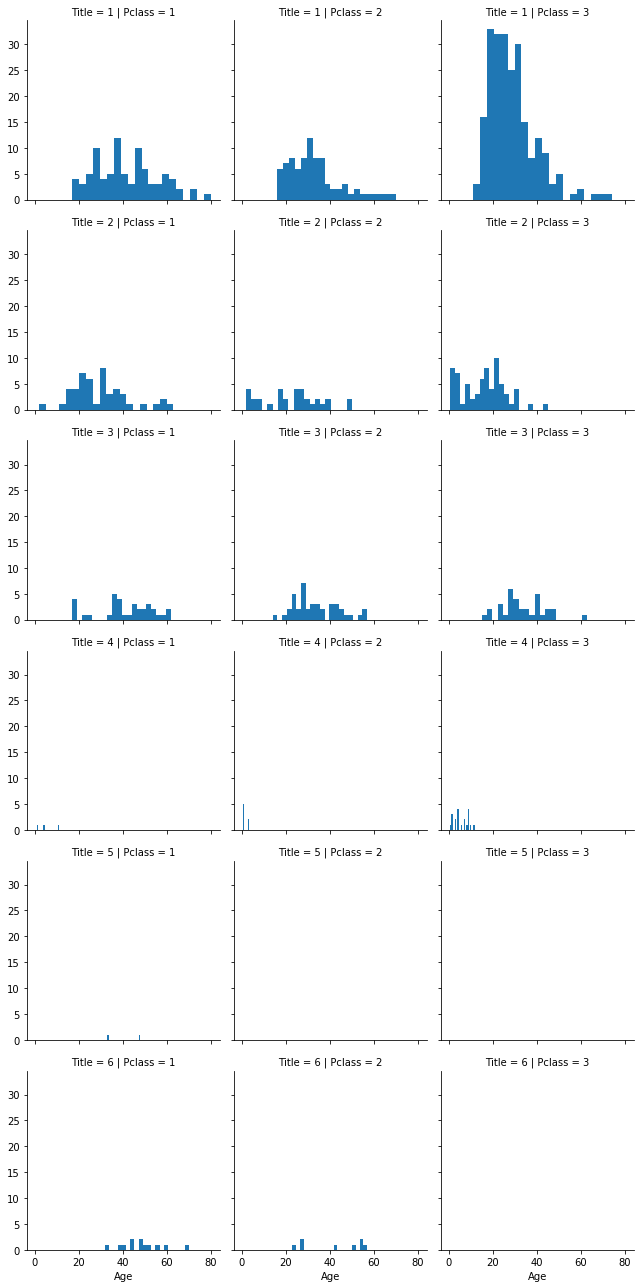

In [40]:
# 对Age字段的空值进行预测补充
# 取相同Pclass和Title的年龄中位数进行补充（Demo为Pclass和Sex）

grid = sns.FacetGrid(train_df,col="Pclass",row="Title")
grid.map(plt.hist,"Age",bins=20)

从图中可以看出，数量最多的柱子基本都在比较中间的位置，因此选择用中位数进行替代

In [41]:
guess_age = np.zeros((6,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
# 给age年龄字段的空值填充估值
# 使用相同Pclass和Title的Age中位数来替代（对于中位数为空的组合，使用Title整体的中位数来替代）


for dataset in combine:
    # 取6种组合的中位数
    # range(0,6)是i遍历0，1，2，3，4，5，6
    for i in range(0, 6):
        
        for j in range(0, 3):
            guess_title_df = dataset[dataset["Title"]==i+1]["Age"].dropna()  # 默认丢弃含有缺失值的行，这样算均值的时候就不包含空值
            
            guess_df = dataset[(dataset['Title'] == i+1) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            #另一种填充方法？
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            #对某个值是否为空值进行判断，只能用np.isnan(i)函数，万万不可用 i == np.nan()来做
            #    ~  <-  按位取反运算符：对数据的每个二进制位取反,即把1变为0,把0变为1 
            age_guess = guess_df.median() if ~np.isnan(guess_df.median()) else guess_title_df.median()
           
        
            #print(i,j,guess_df.median(),guess_title_df.median(),age_guess)
            # Convert random age float to nearest .5 age
            guess_age[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    # 给满足6中情况的Age字段赋值
    # 用loc可以对数据进行切片，赋值等
    for i in range(0, 6):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i+1) & (dataset.Pclass == j+1),'Age'] = guess_age[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title
0,0,3,0,22,1,0,7.2500,S,23,0,1
1,1,1,1,38,1,0,71.2833,C,51,1,3
2,1,3,1,26,0,0,7.9250,S,22,0,2
3,1,1,1,35,1,0,53.1000,S,44,1,3
4,0,3,0,35,0,0,8.0500,S,24,0,1


## 3.5 IsChidren

In [43]:

# loc后面跟的是方括号
for dataset in combine:
    dataset.loc[dataset["Age"]> 12, "IsChildren"] = 0
    dataset.loc[dataset["Age"]<= 12, "IsChildren"] = 1
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title,IsChildren
0,0,3,0,22,1,0,7.2500,S,23,0,1,0.0
1,1,1,1,38,1,0,71.2833,C,51,1,3,0.0
2,1,3,1,26,0,0,7.9250,S,22,0,2,0.0
3,1,1,1,35,1,0,53.1000,S,44,1,3,0.0
4,0,3,0,35,0,0,8.0500,S,24,0,1,0.0


## 3.6 将Age标准化

In [44]:
# 创建年龄区间特征
# pd.cut是按值的大小均匀切分，每组值区间大小相同，但样本数可能不一致
# pd.qcut是按照样本在值上的分布频率切分，每组样本数相同

train_df["AgeBand"] = pd.qcut(train_df["Age"],8)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean().sort_values(by=["AgeBand"],ascending=True)
# ascending是否按指定列的数组升序排列，默认为True，即升序排列



,AgeBand,Survived
0,"(-0.001, 17.0]",0.538462
1,"(17.0, 21.0]",0.362903
2,"(21.0, 25.0]",0.393939
3,"(25.0, 26.0]",0.120370
4,"(26.0, 31.0]",0.414062
5,"(31.0, 36.5]",0.478261
6,"(36.5, 45.0]",0.388430
7,"(45.0, 80.0]",0.372549


AgeBand是一个中转特征，为了后续将Age标准化，不保留到最后

In [45]:
# 将年龄按照上述区间标准化至0~7

for dataset in combine:
    dataset.loc[dataset["Age"] <= 17, "Age"] = 0
    dataset.loc[(dataset["Age"] > 17) & (dataset["Age"] <= 21), "Age"] = 1
    dataset.loc[(dataset["Age"] > 21) & (dataset["Age"] <= 25), "Age"] = 2
    dataset.loc[(dataset["Age"] > 25) & (dataset["Age"] <= 26), "Age"] = 3
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 31), "Age"] = 4
    dataset.loc[(dataset["Age"] > 31) & (dataset["Age"] <= 36.5), "Age"] = 5
    dataset.loc[(dataset["Age"] > 36.5) & (dataset["Age"] <= 45), "Age"] = 6
    dataset.loc[ dataset["Age"] > 45, "Age"] = 7
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,AgeBand
0,0,3,0,2,1,0,7.2500,S,23,0,1,0.0,"(21.0, 25.0]"
1,1,1,1,6,1,0,71.2833,C,51,1,3,0.0,"(36.5, 45.0]"
2,1,3,1,3,0,0,7.9250,S,22,0,2,0.0,"(25.0, 26.0]"
3,1,1,1,5,1,0,53.1000,S,44,1,3,0.0,"(31.0, 36.5]"
4,0,3,0,5,0,0,8.0500,S,24,0,1,0.0,"(31.0, 36.5]"


In [46]:
# 移除AgeBand

#train_df = train_df.drop(["AgeBand"],axis=1)
#combine = [train_df,test_df]
#train_df.head()

train_df = train_df.drop(["AgeBand"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title,IsChildren
0,0,3,0,2,1,0,7.2500,S,23,0,1,0.0
1,1,1,1,6,1,0,71.2833,C,51,1,3,0.0
2,1,3,1,3,0,0,7.9250,S,22,0,2,0.0
3,1,1,1,5,1,0,53.1000,S,44,1,3,0.0
4,0,3,0,5,0,0,8.0500,S,24,0,1,0.0


In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Namelength,HasCabin,Title,IsChildren
0,0,3,0,2,1,0,7.2500,S,23,0,1,0.0
1,1,1,1,6,1,0,71.2833,C,51,1,3,0.0
2,1,3,1,3,0,0,7.9250,S,22,0,2,0.0
3,1,1,1,5,1,0,53.1000,S,44,1,3,0.0
4,0,3,0,5,0,0,8.0500,S,24,0,1,0.0


## 3.7 FamilySize

In [48]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=False).mean().sort_values(by="FamilySize",ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


## 3.8 IsAlone

In [49]:
# 创建是否独自一人IsAlone特征
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1,"IsAlone"] = 1

train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


移除SibSp和Parch特征

In [50]:
# 给字段赋值可以在combine中循环操作，删除字段不可以，需要对指定的df进行操作

train_df=train_df.drop(["SibSp","Parch"],axis=1)
test_df=test_df.drop(["SibSp","Parch"],axis=1)
combine = [train_df , test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,S,23,0,1,0.0,2,0
1,1,1,1,6,71.2833,C,51,1,3,0.0,2,0
2,1,3,1,3,7.9250,S,22,0,2,0.0,1,1
3,1,1,1,5,53.1000,S,44,1,3,0.0,2,0
4,0,3,0,5,8.0500,S,24,0,1,0.0,1,1


## 3.9 Embarked

In [51]:
# 给Embarked补充空值
# 选取出现次数最多的港口
#[0]表示如果有同时存在的众数，显示第一个

freq_port = train_df["Embarked"].dropna().mode()[0]
freq_port

'S'

In [52]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
    
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


将Embarked映射为数字

In [53]:
for dataset in combine:
    e_mapping = {"S":0 , "C":1, "Q":2}
    dataset["Embarked"] = dataset["Embarked"].map(e_mapping).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,0,23,0,1,0.0,2,0
1,1,1,1,6,71.2833,1,51,1,3,0.0,2,0
2,1,3,1,3,7.9250,0,22,0,2,0.0,1,1
3,1,1,1,5,53.1000,0,44,1,3,0.0,2,0
4,0,3,0,5,8.0500,0,24,0,1,0.0,1,1


In [54]:
train_df[np.isnan(train_df["Embarked"])]

,Survived,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone


## 3.10 Fare

使用中位数给测试集中的Fare填充空值

In [55]:
# 给测试集中的Fare填充空值，使用中位数
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
Namelength     418 non-null int64
HasCabin       418 non-null int64
Title          418 non-null int64
IsChildren     418 non-null float64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int32(3), int64(7)
memory usage: 34.4 KB


In [56]:
# 创建FareBand区间特征
train_df["FareBand"] = pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [57]:
# 根据FareBand将Fare特征转换为序数值
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,0,0,23,0,1,0.0,2,0
1,1,1,1,6,3,1,51,1,3,0.0,2,0
2,1,3,1,3,1,0,22,0,2,0.0,1,1
3,1,1,1,5,3,0,44,1,3,0.0,2,0
4,0,3,0,5,1,0,24,0,1,0.0,1,1
5,0,3,0,3,1,2,16,0,1,0.0,1,1
6,0,1,0,7,3,0,23,1,1,0.0,1,1
7,0,3,0,0,2,0,30,0,4,1.0,5,0
8,1,3,1,4,1,0,49,0,3,0.0,3,0
9,1,2,1,0,2,1,35,0,3,0.0,2,0


## 3.11 特征相关性可视化

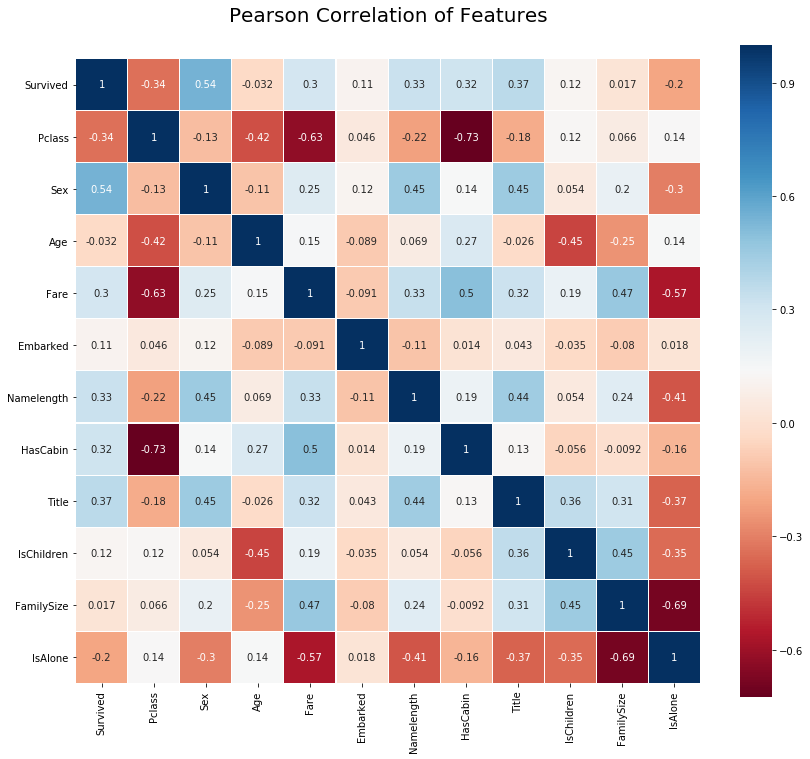

In [58]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
colormap = plt.cm.RdBu
# plt.figure用来画图，可以自定义画布大小
plt.figure(figsize=(14,12))
# y=1.05修改的是标题到图片的距离 或者标题栏所占据的高度？
# size=20修改的是标题文字的大小
plt.title('Pearson Correlation of Features', y=1.05, size=20)

# annot=True 图上每个单元格有相关性系数的具体值 False图上没有具体的值
# 只有数据类型为float才可以绘制热力图？
# linewidths是指划分每个单元格的间隙的宽度
# cmap是指热力图配色的选择
# cbar为True即绘制颜色条，为Falese即不绘制颜色条
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, cbar=True)


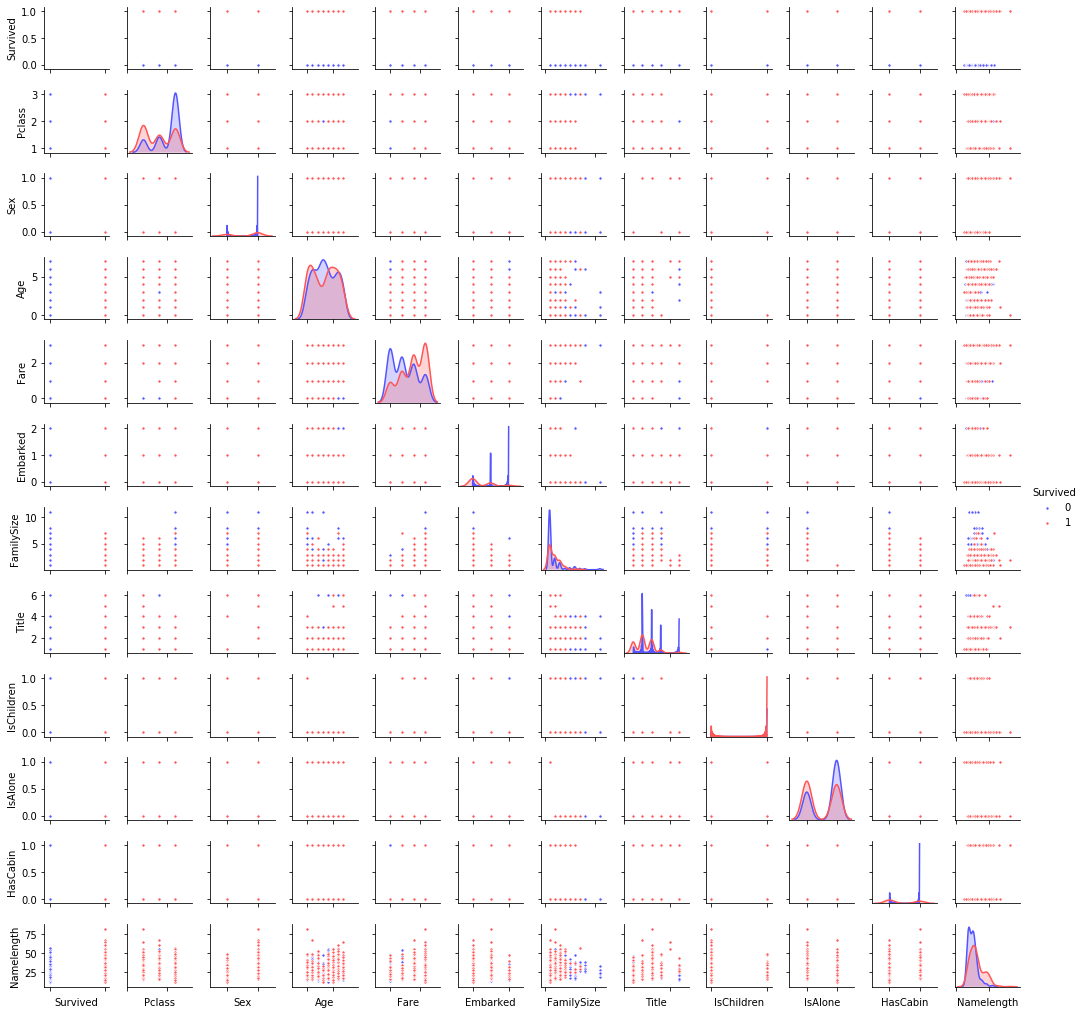

In [60]:
# 用seaborn的pairplot看各特征组合的样本分布

# u:表示unicode字符串，不是仅仅是针对中文, 可以针对任何的字符串，代表是对字符串进行unicode编码。
#一般英文字符在使用各种编码下, 基本都可以正常解析, 所以一般不带u；但是中文, 必须表明所需编码, 否则一旦编码转换就会出现乱码。

# hue:使用指定变量为分类变量画图。参数类型：string (变量名)
g = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked',
       u'FamilySize', u'Title', u'IsChildren', u'IsAlone', u'HasCabin',u'Namelength']], 
                 hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',
                 diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## 3.12 训练集和测试集准备

In [63]:
# 将原来的样本中的survived提取出来作为y，剩余特征作为变量x

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()

X_train.shape ,Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [65]:
# copy() 之后的子表没有"PassengerId"这一列了

X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,3,0,5,0,2,16,0,1,0.0,1,1
1,3,1,7,0,0,32,0,3,0.0,2,0
2,2,0,7,1,2,25,0,1,0.0,1,1
3,3,0,4,1,0,16,0,1,0.0,1,1
4,3,1,2,1,0,44,0,3,0.0,3,0


In [66]:
# 原表仍然有"PassengerId"这一列

test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Namelength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,892,3,0,5,0,2,16,0,1,0.0,1,1
1,893,3,1,7,0,0,32,0,3,0.0,2,0
2,894,2,0,7,1,2,25,0,1,0.0,1,1
3,895,3,0,4,1,0,16,0,1,0.0,1,1
4,896,3,1,2,1,0,44,0,3,0.0,3,0


# 4.建模和优化